# Regression

**Linear Regression** : use it when response variable is numeric.
**Logistic Regression**: use it when response variable is logical.

**Simple linear/logistic regression**: there is only one explanotary variable.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
taiwan_real_estate = pd.read_csv("/home/umut/python_calismalar/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


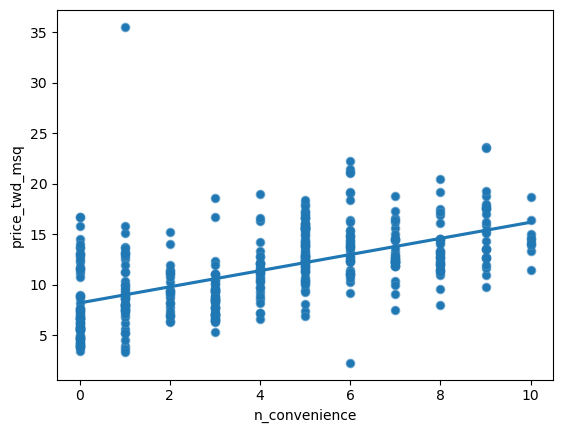

In [4]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

In [5]:
from statsmodels.formula.api import ols

In [6]:
# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [7]:
fish = pd.read_csv("/home/umut/python_calismalar/fish.csv")
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


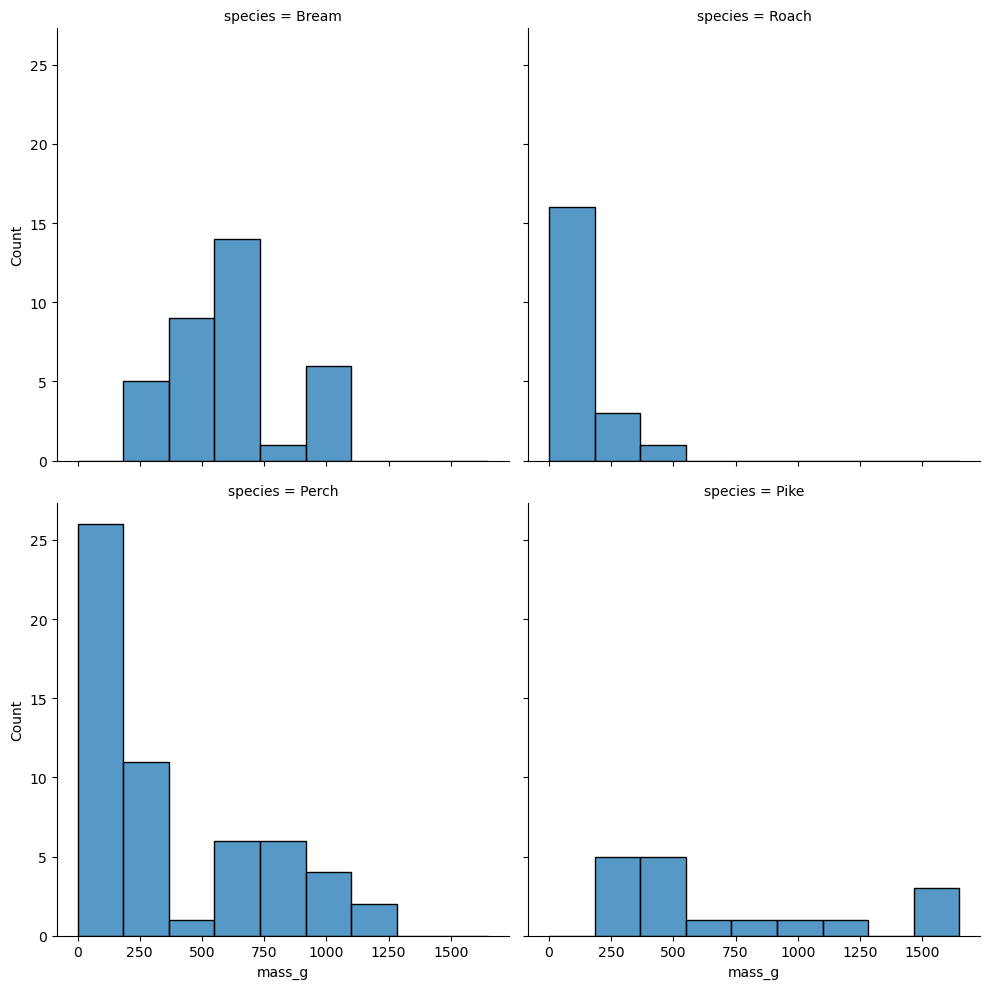

In [8]:
sns.displot(data=fish, x="mass_g", col="species", col_wrap=2, bins=9 )
plt.show()

In [9]:
fish.groupby("species")[["mass_g"]].mean()

,mass_g
species,
Bream,617.828571
Perch,382.239286
Pike,718.705882
Roach,152.050000


In [10]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


In [11]:
# get bream.

bream = fish[fish["species"] == "Bream"]
bream

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
5,Bream,450.0,26.8
6,Bream,500.0,26.8
7,Bream,390.0,27.6
8,Bream,450.0,27.6
9,Bream,500.0,28.5


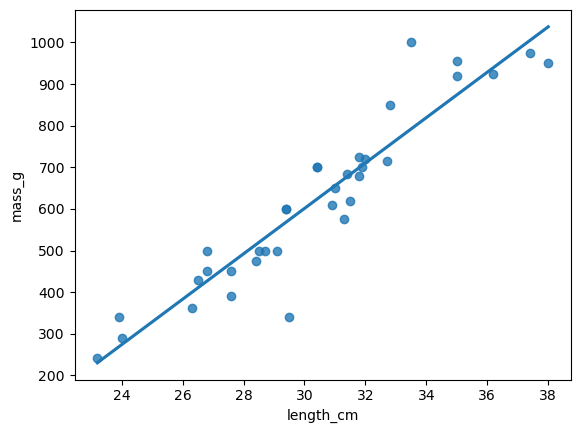

In [12]:
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
plt.show()

In [13]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [14]:
explanatory_data = pd.DataFrame({"length_cm" : np.arange(20,41)})

# Predict
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [15]:
# Daha açıklayıcı olan versiyonu:
explanatory_data = pd.DataFrame({"length_cm" : np.arange(20,41)})

prediction_data = explanatory_data.assign(

    mass_g = mdl_mass_vs_length.predict(explanatory_data)
    
)

prediction_data

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


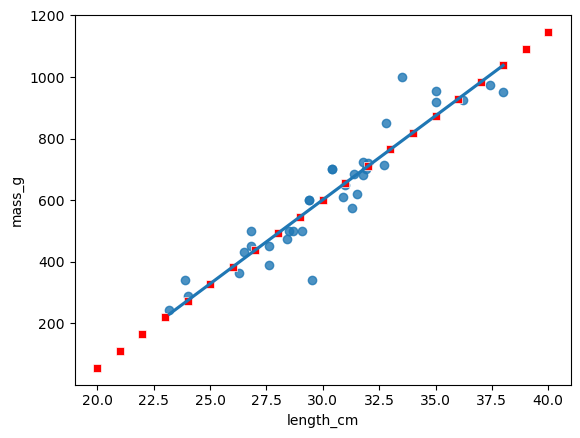

In [16]:
# tahmini grafiğe dökelim.

fig = plt.figure()

sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)

sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color="r", marker="s")

plt.show()


# Extrapolating ? 

- Extrapolating means making predictions outside the range of observed data.

In [17]:
# .fittedvalues: predictions on the original dataset.

bream["predicted_mass_g"] = mdl_mass_vs_length.fittedvalues
bream.head()

/tmp/ipykernel_9715/3126968052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bream["predicted_mass_g"] = mdl_mass_vs_length.fittedvalues


,species,mass_g,length_cm,predicted_mass_g
0,Bream,242.0,23.2,230.211993
1,Bream,290.0,24.0,273.851977
2,Bream,340.0,23.9,268.396979
3,Bream,363.0,26.3,399.316934
4,Bream,430.0,26.5,410.226930


In [18]:
# .resid : actual response values minus predicted response values

print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [19]:
# summary of the model
mdl_mass_vs_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.22e-16
Time:                        10:48:51   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
perch = fish[fish["species"] == "Perch"]
perch

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7
60,Perch,100.0,16.2
61,Perch,78.0,16.8
62,Perch,80.0,17.2
63,Perch,85.0,17.8
64,Perch,85.0,18.2


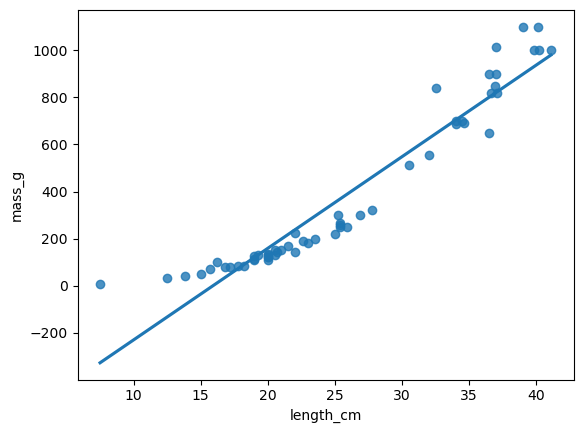

In [21]:
# It's not a linear relationship.
# Perch balık türü 3 boyutta büyür yani, uzun ince bir malık değildir. Büyürken neredeyse aynı oranda kalınlaşır yani 3 boyutta büyür.
sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
plt.show()

/tmp/ipykernel_9715/3285410153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch["length_cm_cubed"] = perch["length_cm"] ** 3


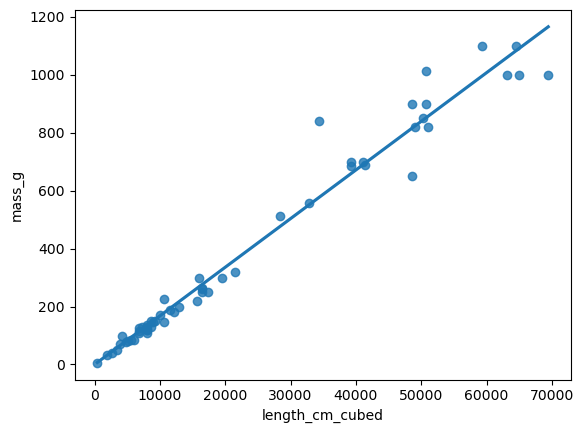

In [22]:
# Boyun küpü ile kilo arasında linear bir ilişki var.
perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)
plt.show()

In [23]:
mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
print(mdl_perch.params)

explanatory_data = pd.DataFrame({"length_cm_cubed" : np.arange(10,41,5) **3,
                                 "length_cm" : np.arange(10,41,5)})

prediction_data = explanatory_data.assign(
    mass_g = mdl_perch.predict(explanatory_data)
)
print(prediction_data)

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64
   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


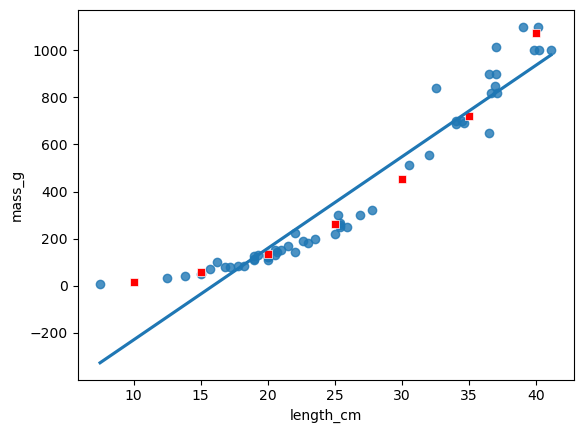

In [24]:
fig = plt.figure()
ax1=sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
ax1=sns.scatterplot(data=prediction_data, x="length_cm", y="mass_g", color="red", marker="s")
plt.show()

# Çarpık(Skewed) Verilerde

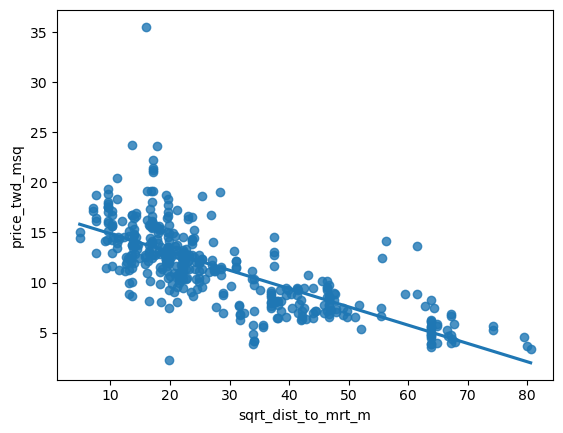

In [25]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m",y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

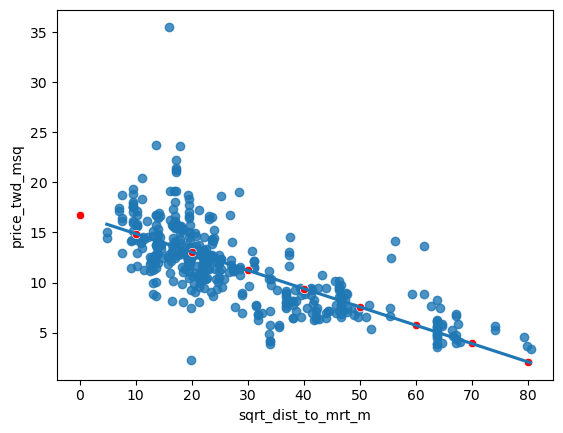

In [26]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

In [27]:
ad_conversion = pd.read_csv("/home/umut/python_calismalar/ad_conversion.csv")
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


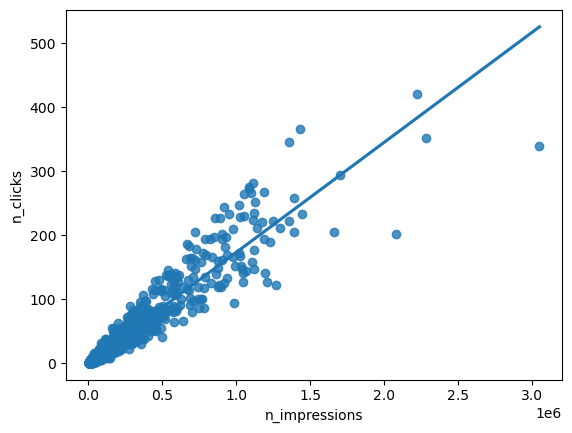

In [28]:
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
plt.show()

#This data is right skewed, we can understand that from this graph.

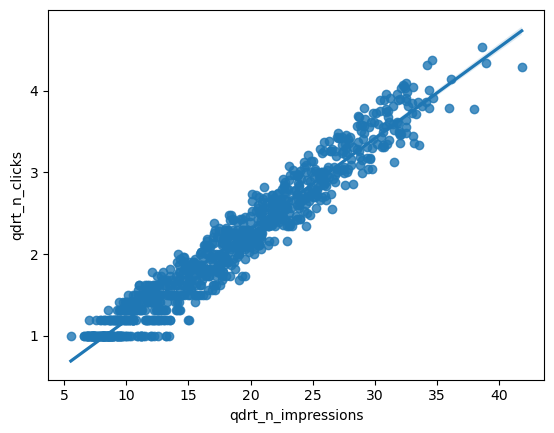

In [29]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] **0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] **0.25
# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions",y="qdrt_n_clicks", data=ad_conversion)
plt.show()

#This looks much better.

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64
   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


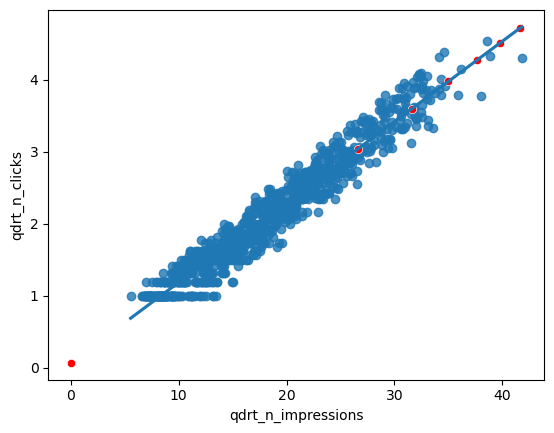

In [30]:
mdl_nclicks_nimpressions = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()
print(mdl_nclicks_nimpressions.params)

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_nclicks_nimpressions.predict(explanatory_data)
)

# Print the result
print(prediction_data)

# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="r")
plt.show()

# Quantifying Model Fit

## Coefficient of Determination

- **r-squared:** for simple linear regression
- **R-squared:** for more than one exploratory variable.

0<= r-squared <= 1

In [31]:
# Model bream.
print(mdl_mass_vs_length.summary())
print("\n\nr-squared value of the model:",mdl_mass_vs_length.rsquared)

coeff_determination = bream["length_cm"].corr(bream["mass_g"]) **2
print("\n\nManually calculated r-squared value:",coeff_determination)

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.22e-16
Time:                        10:48:52   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

## Residual Standard Error (RSE)

- Her bir residual'ın standard sapması.
- Same unit with response variable.
- MSE = RSE^2

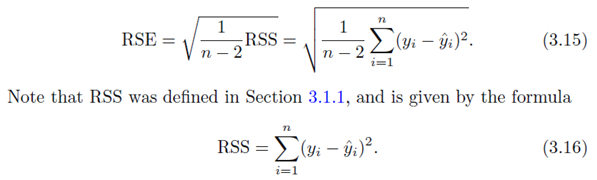
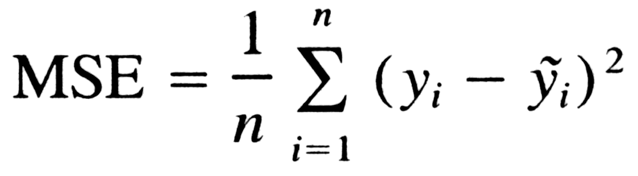
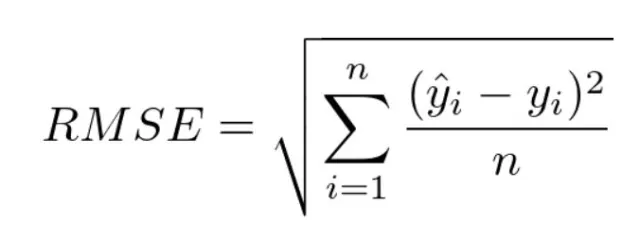

In [32]:
mse = mdl_mass_vs_length.mse_resid
print("mse : ", mse)

rse = np.sqrt(mse)
print("rse : ", rse)
print("74 rse means, the difference between predicted bream masses and observer bream masses is typically about 74g.")

#Calculating rse manually.
residuals_sq = mdl_mass_vs_length.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
deg_freedom = len(bream.index) - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)
print("rse :", rse)

# Calculating RMSE manually.
residuals_sq = mdl_mass_vs_length.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
n_obs = len(bream.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)
print("rmse :", rmse)

mse :  5498.555084973523
rse :  74.15224261594199
74 rse means, the difference between predicted bream masses and observer bream masses is typically about 74g.
rse : 74.15224261594199
rmse : 72.0024439672762


## Visualizing Model Fit

**Q-Q plot**: Residual'ların normal bir dağılım izleyip izlemediğini gösterir.

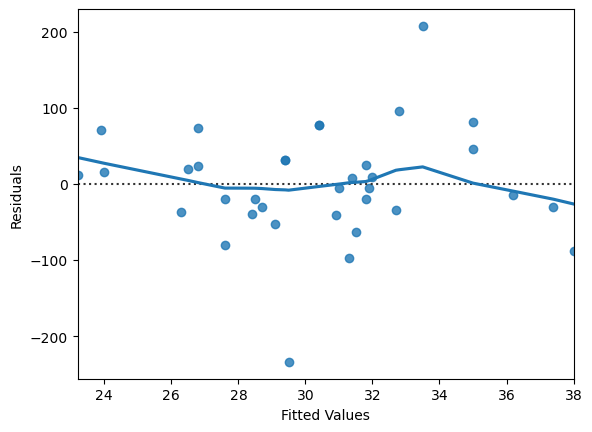

In [33]:
# residplot()
sns.residplot(x="length_cm", y="mass_g", data=bream, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

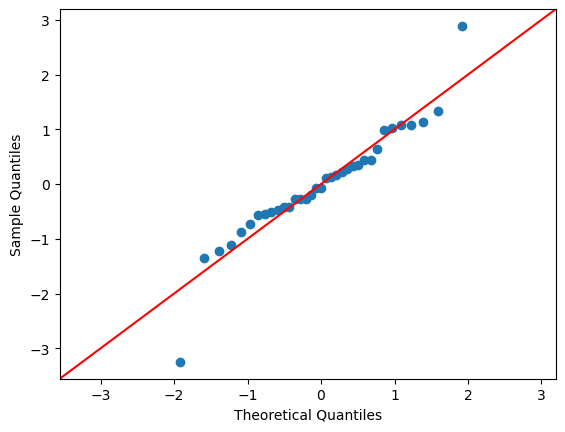

In [34]:
# qqplot
from statsmodels.api import qqplot

mdl_bream = mdl_mass_vs_length

qqplot(data=mdl_bream.resid, fit=True, line="45") # 45'derecelik bir eğri çizmesini sağlar.
plt.show()

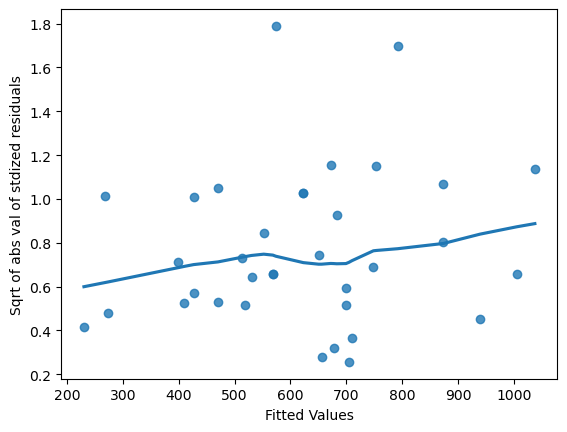

In [35]:
# scale-location plot
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal # öncelikle normalleştirilmiş residual'ları çıkaracağız.
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream)) # daha sonra bunların mutlak değerini karekök içerisine alarak standart hale getiriyoruz.

sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

## Outliers, Leverage and Influence

- **LEVERAGE**: açıklayıcı değişken değerlerinin ne kadar uç noktada olduğunu hesaplar.
- **INFLUENCE**: dışarıda bıraktığın gözleme göre modelin ne kadar değişeceğinin hesaplanmasıdır.
    - Cook's distance, çok yaygın bir influence ölçme yöntemidir.

In [36]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values("leverage", ascending=False).head())

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  
     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6  

## Logistic Regression

In [48]:
churn = pd.read_csv("/home/umut/python_calismalar/churn.csv")
churn.head(6)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
5,0,0.493400,-0.770003


In [49]:
from statsmodels.formula.api import logit
#Logistic Regression
mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
#Linear Model
mdl_churn_vs_recency_lm = ols("has_churned ~ time_since_last_purchase", data=churn).fit()

print(mdl_churn_vs_recency_logit.params)
print(mdl_churn_vs_recency_lm.params)

intercept,slope = mdl_churn_vs_recency_lm.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


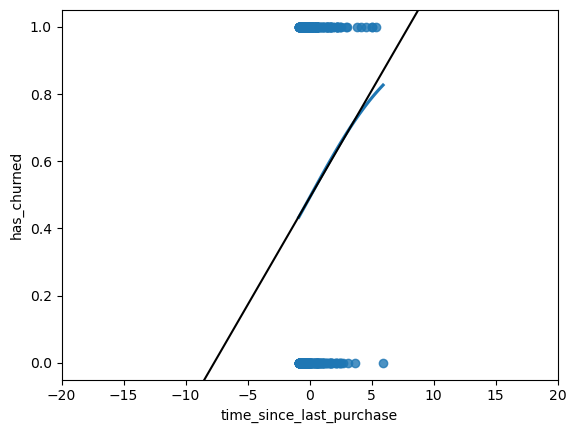

In [53]:
# Logistic regresyon'un grafiğini çizdirdik.
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
# Bu grafiğe LM'in eğrisini ekledik.
plt.axline(xy1=(0, intercept), slope=slope, color="black")
plt.xlim(-20,20)
plt.show()

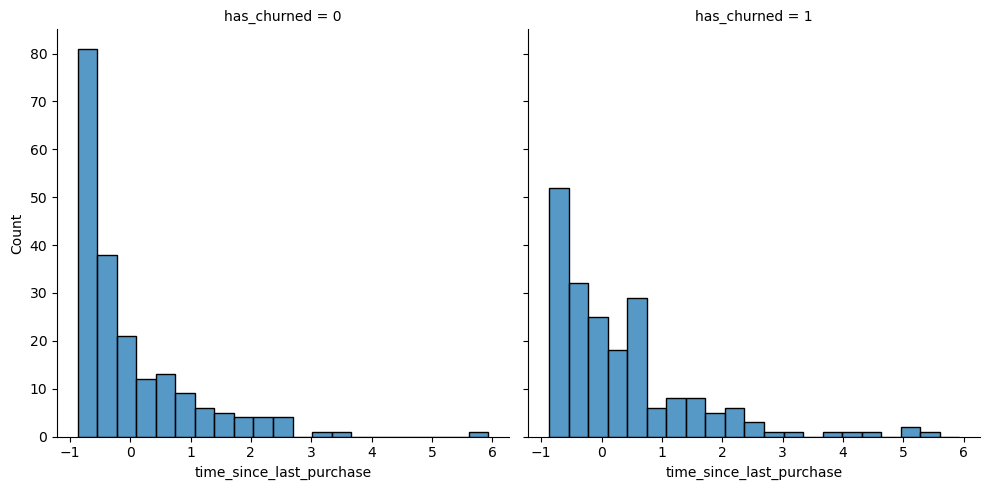

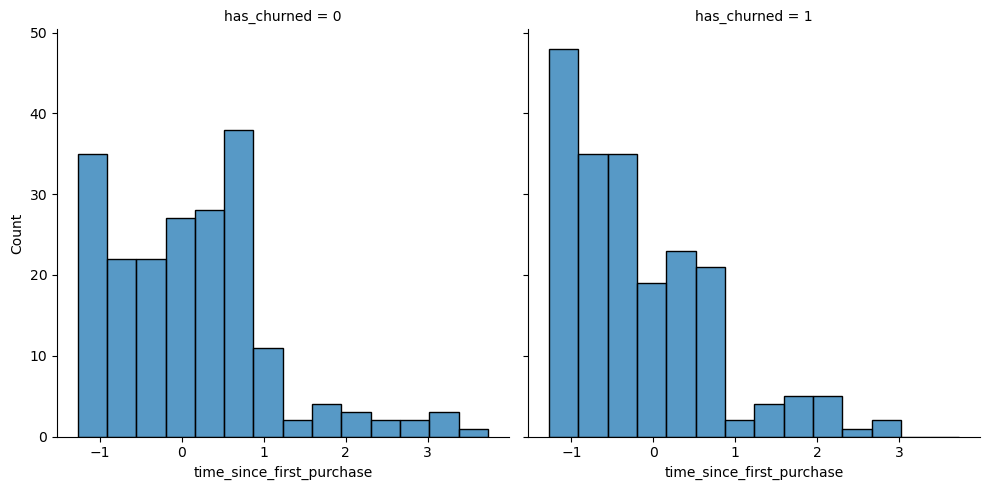

In [39]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x="time_since_last_purchase", col="has_churned", data=churn)
plt.show()

# Redraw the plot with time_since_first_purchase
sns.displot(x="time_since_first_purchase", col="has_churned", data=churn)

plt.show()

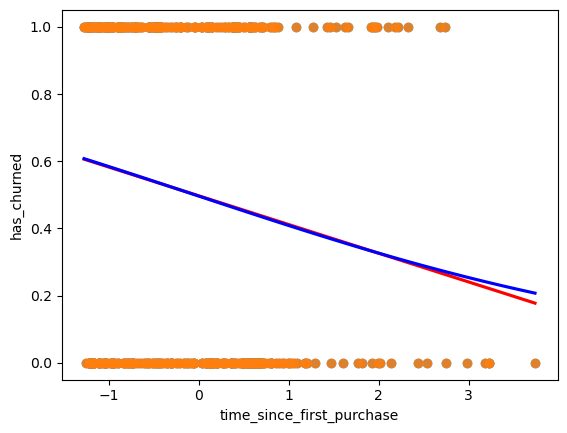

In [40]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic=True,
            line_kws={"color":"blue"}
            )

plt.show()

In [41]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions with Logistic Regression

In [56]:
mdl_recency = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

explanatory_data = pd.DataFrame({"time_since_last_purchase" : np.arange(-1, 6.25, 0.25)})

prediction_data = explanatory_data.assign(
    has_churned = mdl_recency.predict(explanatory_data)
)

prediction_data.head()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246


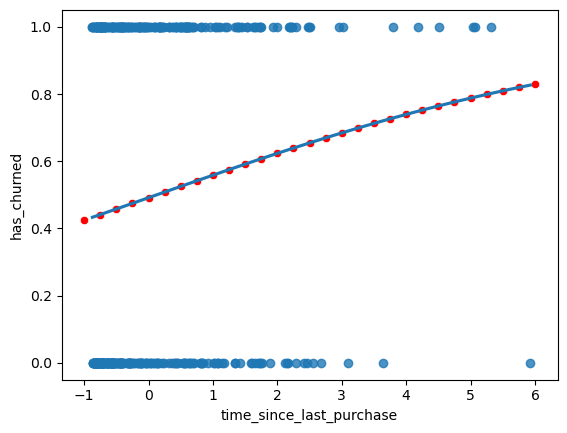

In [59]:
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=prediction_data, color="r")
plt.show()

Bir diğer sonuç tahmin yöntemi "most likely outcome"'dir. Burada göz önünde bulunduracağımız şey bir müşteri churned olacak ise 1, olmayacak ise 0 sonucu almamız gerek. Yani grafikte şu anda gördüğümüz olasılıkları np.round() fonksiyonu ile yuvarlayıp 1-0 haline çevirmektir.

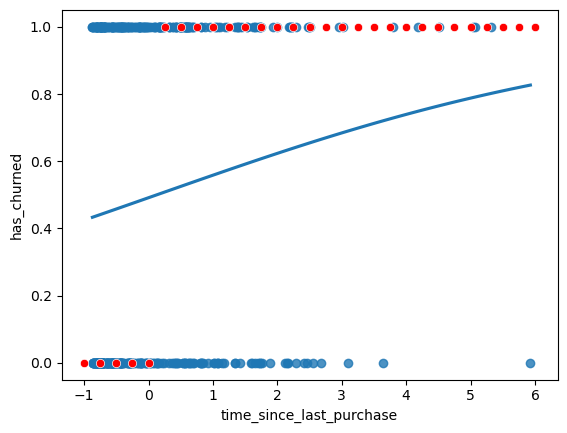

In [65]:
# Getting Most Likely Outcome.
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
sns.scatterplot(x="time_since_last_purchase", y="most_likely_outcome", data=prediction_data, color="r")
plt.show()

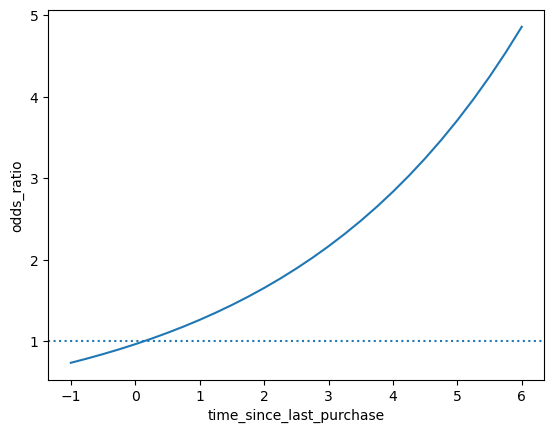

In [68]:
# Odds ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data)
plt.axhline(y=1, linestyle="dotted")
plt.show()

## Performans of Logistic Reg. Models

In [71]:
actual_response = churn["has_churned"]
predicted_response = np.round(mdl_recency.predict())

outcomes = pd.DataFrame({"actual_response" : actual_response,
                         "predicted_response" : predicted_response})

print(outcomes.value_counts(sort=False))

conf_matrix = mdl_recency.pred_table()
print(conf_matrix)


actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
dtype: int64
[[141.  59.]
 [111.  89.]]


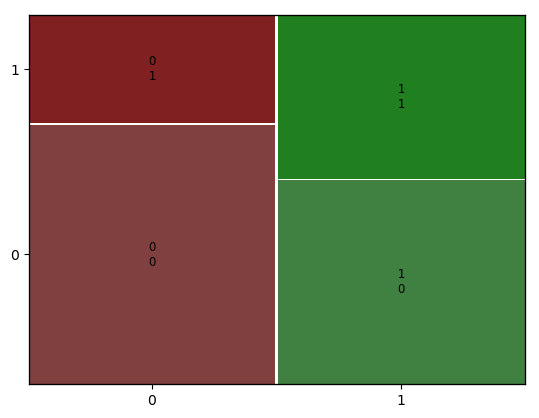

In [75]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)
plt.show()

**ACCURACY:** is the proportion of correct predictions.

In [76]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TN + TP) / (TN + TP + FN + FP)
print(acc)

0.575


**SENSIVITY**: is proportion of true positives.

In [77]:
sens = TP / (FN + TP)
print(sens)

0.445


**Specificity**: is proportion of true negatives.

In [79]:
spec = TN / (TN + FP)
print(spec)

0.705
